## 1  Preliminaries

In [1]:
# The usual preamble
import pandas as pd
from matplotlib import pyplot as plt
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 
from google.colab import drive
import os.path
import pandas as pd

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
data_dir ='/content/gdrive/My Drive/data'
#figsize(15, 5)

ModuleNotFoundError: No module named 'google'

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

os.chdir(data_dir)

years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']

for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [13]:
import pandas as pd
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'])

## 2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [14]:
names2000['name']

0          Emily
1         Hannah
2        Madison
3         Ashley
4          Sarah
          ...   
29753       Zeph
29754      Zeven
29755      Ziggy
29756         Zo
29757      Zyier
Name: name, Length: 29758, dtype: object

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [15]:
names2000[:25]

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
5,Alexis,F,17622
6,Samantha,F,17262
7,Jessica,F,15698
8,Elizabeth,F,15077
9,Taylor,F,15076


In the next cell write an expression that returns the first 25 row of the `name` column.

In [16]:
names2000['name'][:25]

0         Emily
1        Hannah
2       Madison
3        Ashley
4         Sarah
5        Alexis
6      Samantha
7       Jessica
8     Elizabeth
9        Taylor
10       Lauren
11       Alyssa
12        Kayla
13      Abigail
14      Brianna
15       Olivia
16         Emma
17        Megan
18        Grace
19     Victoria
20       Rachel
21         Anna
22       Sydney
23      Destiny
24       Morgan
Name: name, dtype: object

## 2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `births` and `sex` columns of the `names2000` dataframe.

In [20]:
names2000[['births','sex']]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
...,...,...
29753,5,M
29754,5,M
29755,5,M
29756,5,M


Now write an expression that returns just the first ten rows of the dataframe you returned in the cell above. 

In [21]:
names2000[['births','sex']][:10]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
5,17622,F
6,17262,F
7,15698,F
8,15077,F
9,15076,F


## Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

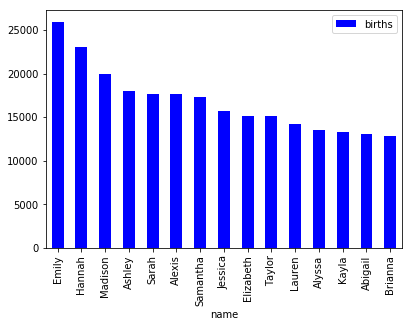

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
names2000 = pd.read_csv('names/yob2000.txt',names=['name','sex','births'],index_col=['name'])
names2000[:15].plot(kind='bar')

In [ ]:
True

True

# Aggregation

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

In [ ]:
import pandas as pd
complaints = pd.read_csv('311-service-requests.csv',low_memory=False)
complaints['Count'] = 1

Looking at the `Count` column:

In [ ]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [ ]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.

In [ ]:
pt0 = pt00.pivot_table('Count', 'Agency' , columns = 'Complaint Type',
                       aggfunc=sum)

In [ ]:
pt0

Complaint Type,Agency Issues,Animal Abuse,Bike Rack Condition,Bike/Roller/Skate Chronic,Blocked Driveway,Bridge Condition,Broken Muni Meter,Bus Stop Shelter Placement,Compliment,Curb Condition,...,Street Condition,Street Light Condition,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Traffic,Traffic Signal Condition,Tunnel Condition,Urinating in Public,Vending
Agency,,,,,,,,,,,,,,,,,,,,,
DOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOT,20.0,NaN,7.0,NaN,NaN,20.0,2070.0,14.0,1.0,66.0,...,3473.0,7117.0,691.0,110.0,327.0,NaN,3145.0,1.0,NaN,NaN
NYPD,NaN,164.0,NaN,32.0,4590.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,168.0,NaN,NaN,30.0,229.0


In [ ]:
pd.pivot??

Object `pd.pivot` not found.


# 4.  Baby names questions

In [26]:
from google.colab import drive
import os.path
import pandas as pd

# Mount google drive to create a filesystem the notebook can use
drive.mount('/content/gdrive') 
# Specify the code dir in the new filesystem.
data_dir ='/content/gdrive/My Drive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
os.chdir(data_dir)

In [28]:
os.getcwd()

'/content/gdrive/My Drive'

In [25]:
!ls /content/gdrive/My\ Drive/data

BicycleWeather.csv     oecd_bli_2015_2.csv    state-areas.csv
births.csv	       president_heights.csv  state-population.csv
california_cities.csv  Seattle2014.csv
names		       state-abbrevs.csv


In [10]:
os.chdir(os.path.join(data_dir,'data'))

years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']

for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [11]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
